# Part II - (Total number of enterprises employees in Saudi Arabia (2022))
## by (Osama Alsubaie)

## Investigation Overview


> This investigation delves into Saudi Arabia's employment landscape for 2022, exploring employee distribution across enterprise sizes, sectors, and regions. We aim to uncover insights about gender, nationality, and regional employment patterns. By examining these aspects, we seek to provide valuable insights into the composition of the Saudi workforce and its economic implications.


## Dataset Overview and Executive Summary

> The dataset includes the total number of employees in Saudi Arabia (Saudi (male) - Saudi (female) - non Saudi (male) - non Saudi (Female)) according to the size of the enterprises (micros, small, medium, and large) and economic activity(using the National Classification of Economic Activities (ISIC4) - the second level) in each geographical region for 2022.
> Enterprise in this presentation refer to the micros, small, medium, and large enterprises given in the dataset by Mushaat.

### Summary of the findings of the analysis:
> - The total number of enterprises employees in Saudi Arabia for the year 2022 is 9,634,948 employees, 88.1% of them are male employees and 11.9% are female employees.
> - The total count of each distribution for the enterprises sizes as follows:
>   - 1031 micro enterprises.
>   - 870 small enterprises.
>   - 559 medium enterprises.
>   - 301 large enterprises.
> - The Total Number of Enterprises Employees in Saudi Arabia Based on the Gender & Nationality for the Year 2022 as follows:
>   - 7,153,550 Non-Saudi Male Employees.
>   - 1,332,956 Saudi Male Employees.
>   - 860,496 Saudi Female Employees.
>   - 287,946 Non-Saudi Female Employees.
> - The number of foreign male employees is higher than the number of Saudi male employees. However, the number of Saudi female is higher than the number of foreign female employees.
> - Riyadh region has the highest number of employees with above 4,000,000, followed by the Eastern region, and then the Makkah region, while the lowest number of employees is in Al Bahah region.
> - Makkah region has double the number of enterprises than the Eastern region, but the Eastern region has more employees than Makkah region. This is because the enterprises in the Eastern region are larger than the enterprises in Makkah region.
> - For large enterprises, the number of Saudi employees is higher than the number of foreign employees.
> - The construction and the retail trade sectors have the highest number of male employees.
> - The human health and the retail trade sectors have the highest number of female employees.
> - The retail trade sector is the second-highest sector for both male and female employees


In [20]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings

warnings.simplefilter("ignore")

import plotly.io as pio
pio.renderers.default = 'notebook'

In [21]:
# load in the dataset into a pandas dataframe
from Translate_Data_Language import main

# get the year and quarters from the user
year = input("Enter the year (e.g., 2022): ")
quarters = range(1, int(input("Enter the number of the quarters exist in the data(e.g., q1, q2, q3, q4): ")) + 1)

# create a dataframe containing all the data for all quarters
# please enter 2022 for the year and 4 for the number of quarters
df = main(year, quarters)

# Since the data is divided into quarters, we will take the 4th quarter data because it has the most recent data for the year 2022
df_2022_q4 = df[df['quarter'] == 4]

## (Total Number of Enterprises Employees for Each Region in Saudi Arabia)
> This diagram shows the total number of employees for each region in Saudi Arabia for the year 2022.

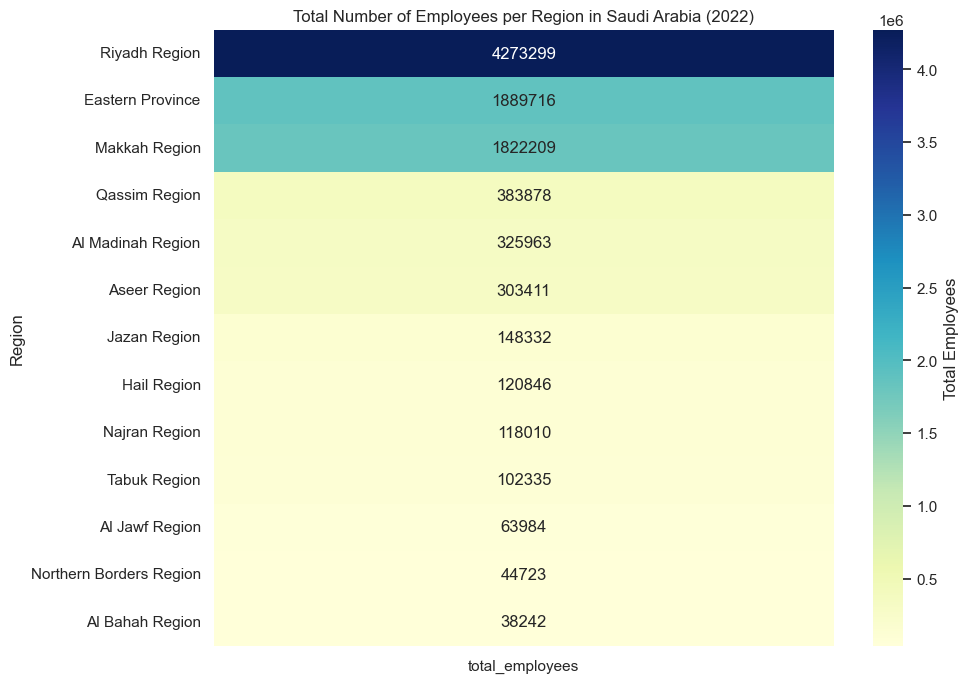

In [22]:
# Group the data and calculate total employees per region
total_employees_per_region = df_2022_q4.groupby('region')[[
    'number_of_saudi_employees', 'number_of_foreign_employees']].sum().sum(axis=1)

# Reset index to make 'region' a column instead of index
total_employees_per_region = total_employees_per_region.reset_index(name='total_employees')

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
pivot_table = total_employees_per_region.pivot_table(index='region', values='total_employees').sort_values(
    by='total_employees', ascending=False)
sns.heatmap(data=pivot_table, annot=True, fmt='.0f', cmap="YlGnBu", cbar_kws={'label': 'Total Employees'})
plt.title('Total Number of Employees per Region in Saudi Arabia (2022)')
plt.ylabel('Region')

# Display the plot
plt.show()

> ### As can be seen in the `Total Number of Employees for Each Region in Saudi Arabia` heatmap that the highest number of employees is in the Riyadh region, followed by the Eastern region, and then the Makkah region, while the lowest number of employees is in Al Bahah region.

## (The Distribution of the Total Employees Based on the Enterprise Sizes)

> This diagram shows the distribution of the total employees based on the enterprise sizes in Saudi Arabia for the year 2022.

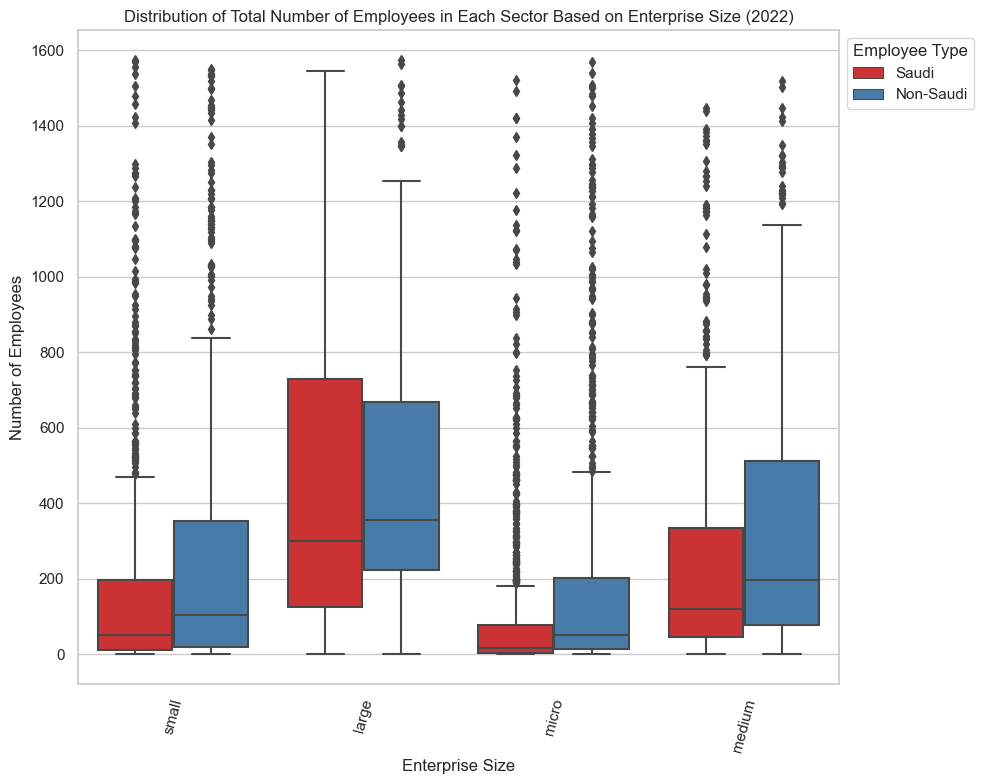

In [23]:
# Make a box plot using Seaborn for this question

# The x-axis will be the enterprise size, and the y-axis will be the number of employees for all enterprises based on the enterprise size
# Set up the plot style
sns.set(style='whitegrid')

# Create a box plot using Seaborn
plt.figure(figsize=(10, 8))

# Combine Saudi and non-Saudi employees data
combined_data = pd.concat([df_2022_q4['number_of_saudi_employees'], df_2022_q4['number_of_foreign_employees']], axis=0)
enterprise_sizes = df_2022_q4['enterprise_size'].tolist() * 2
employee_types = ['Saudi'] * len(df_2022_q4) + ['Non-Saudi'] * len(df_2022_q4)
combined_df = pd.DataFrame(
    {'enterprise_size': enterprise_sizes, 'employee_type': employee_types, 'number_of_employees': combined_data})

# Remove outliers
# Calculate the first and third quartiles
q1 = combined_df['number_of_employees'].quantile(0.25)
q3 = combined_df['number_of_employees'].quantile(0.75)

# Calculate the interquartile range
iqr = q3 - q1

# Calculate the upper and lower bounds
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

# Remove outliers
combined_df = combined_df[
    (combined_df['number_of_employees'] > lower_bound) & (combined_df['number_of_employees'] < upper_bound)]

box_plot = sns.boxplot(data=combined_df, x='enterprise_size', y='number_of_employees', hue='employee_type',
                       palette='Set1')
plt.title('Distribution of Total Number of Employees in Each Sector Based on Enterprise Size (2022)')
plt.xlabel('Enterprise Size')
plt.ylabel('Number of Employees')
plt.xticks(rotation=75)
plt.legend(title='Employee Type', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

# Display the plot
plt.show()

> ### As can be seen from the above plot that the number of employees is higher in larger enterprises. This makes sense because larger enterprises have more employees than smaller enterprises. However, We can Observe that the number of Saudi employees is higher than the number of non-Saudi employees in the large enterprise sizes, which is not the case for other enterprise sizes. This is because the Saudi government is trying to increase the number of Saudi employees in the private sector. Therefore, the number of Saudi employees is higher than the number of non-Saudi employees in the large enterprise sizes.

## (The Total Number of Employees Based on Nationality for Each Region in Saudi Arabia (2022))

> This diagram shows the number of Saudi employees and non-Saudi employees for each region in Saudi Arabia for the year 2022.

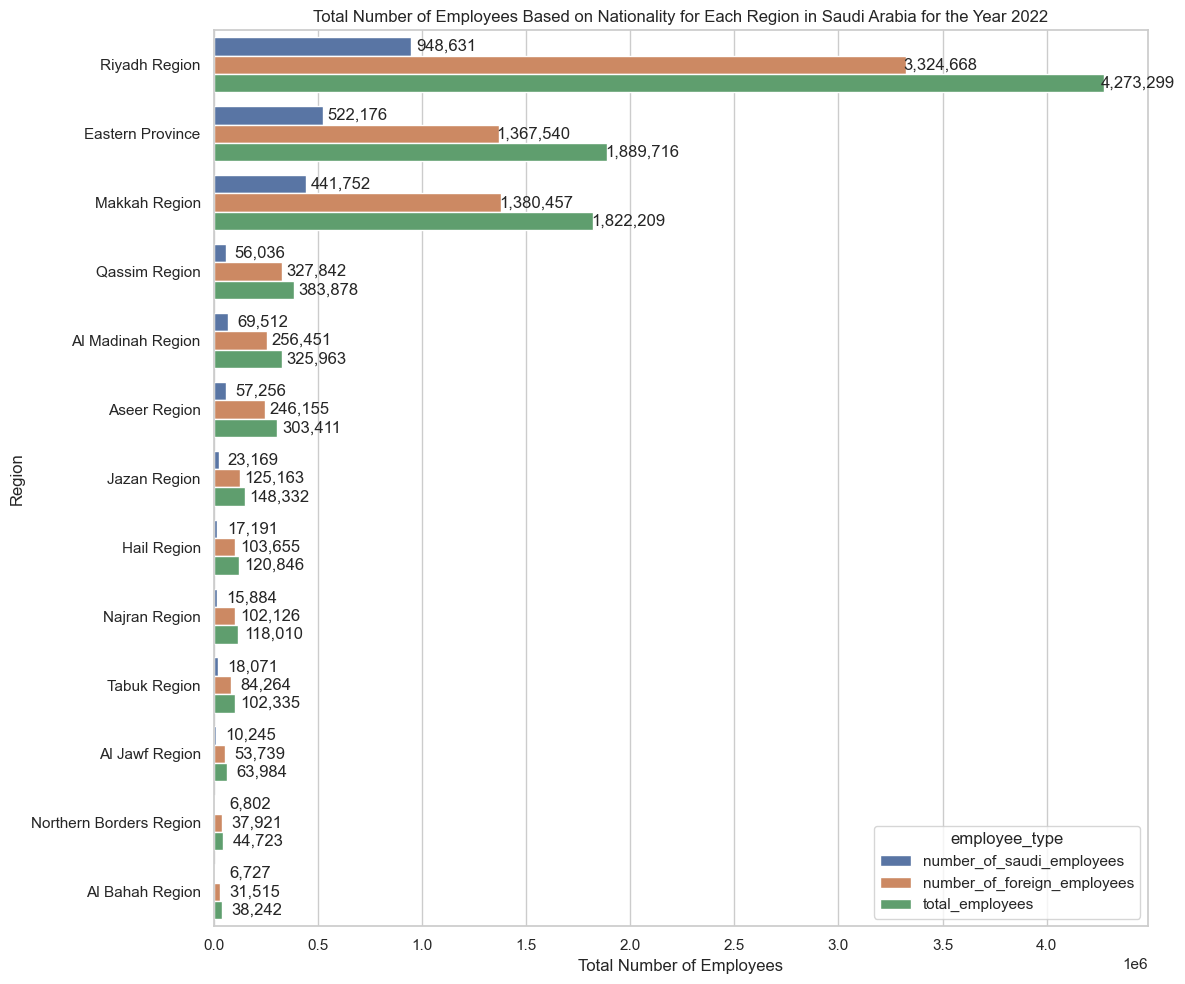

In [24]:
# another way to do it
# Group the data and calculate total employees per region
total_employees_per_region = df_2022_q4.groupby('region')[[
    'number_of_saudi_employees', 'number_of_foreign_employees']].sum()

# Reset index to make 'region' a column instead of index
total_employees_per_region = total_employees_per_region.reset_index()

# Calculate total employees by region and employee type
total_employees_per_region['total_employees'] = total_employees_per_region[
    ['number_of_saudi_employees', 'number_of_foreign_employees']].sum(axis=1)

# Sort the data by total employees in descending order
total_employees_per_region = total_employees_per_region.sort_values(by='total_employees', ascending=False)

# Melt the data to make it suitable for a bar chart
melted_data = total_employees_per_region.melt(id_vars='region', var_name='employee_type', value_name='total_employees_count')

# Create a bar chart using Seaborn
plt.figure(figsize=[12, 10])
bar_plot = sns.barplot(data=melted_data, x='total_employees_count', y='region', hue='employee_type', orient='h')
plt.title('Total Number of Employees Based on Nationality for Each Region in Saudi Arabia for the Year 2022')
plt.xlabel('Total Number of Employees')
plt.ylabel('Region')
plt.tight_layout()

# Add counts above the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_width(), ',.0f'),
                      (p.get_width(), p.get_y() + p.get_height() / 2),
                      ha='center', va='center',
                      xytext=(25, 0),
                      textcoords='offset points')

plt.tight_layout()

# Display the plot
plt.show()

> ### As can be seen from the above plot that the number of non-Saudi employees is higher than the number of Saudi employees in all regions of Saudi Arabia.

## (The 5 Most Sectors That Have The Highest Number Of Male Employees, And The 5 Most Sectors That Have The Highest Number Of Female Employees)

> This heatmap shows the number of male and female employees in the top 5 sectors with the highest number of male employees and the top 5 sectors with the highest number of female employees in Saudi Arabia in 2022.

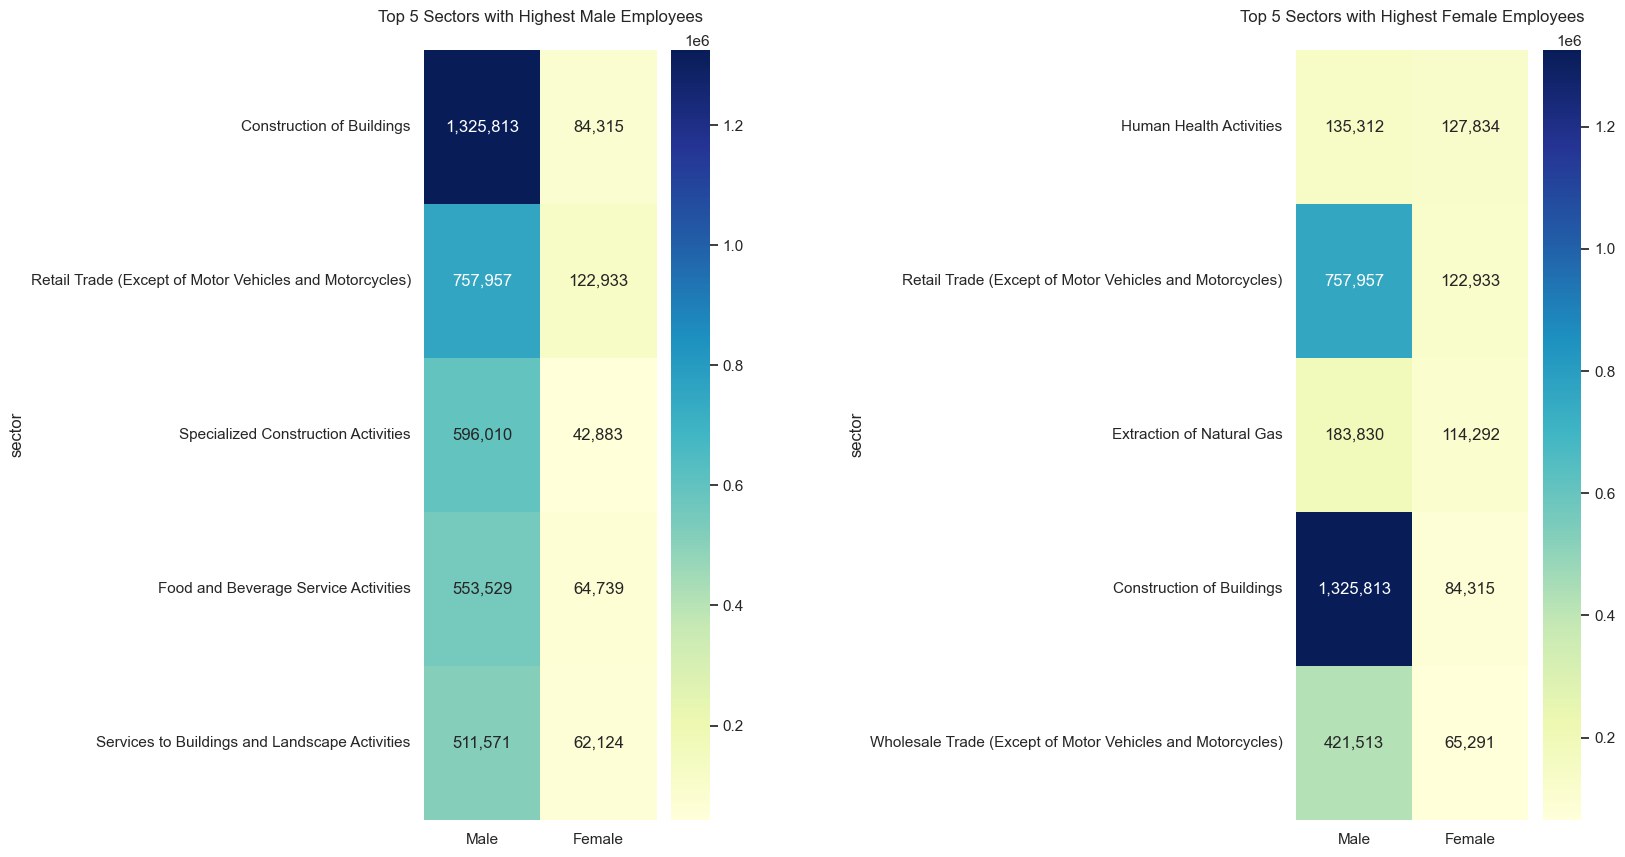

In [25]:
# Group the data by sector and calculate the sum of male and female employees
highest_sectors_of_employees = df_2022_q4.groupby('sector').agg({
    'number_of_saudi_employees (male)': 'sum',
    'number_of_foreign_employees (male)': 'sum',
    'number_of_saudi_employees (female)': 'sum',
    'number_of_foreign_employees (female)': 'sum'
})

# Calculate the total male employees by summing Saudi and foreign employees
highest_sectors_of_employees['total_male_employees'] = (
        highest_sectors_of_employees['number_of_saudi_employees (male)'] +
        highest_sectors_of_employees['number_of_foreign_employees (male)']
)

# Calculate the total female employees by summing Saudi and foreign employees
highest_sectors_of_employees['total_female_employees'] = (
        highest_sectors_of_employees['number_of_saudi_employees (female)'] +
        highest_sectors_of_employees['number_of_foreign_employees (female)']
)

# Get the 5 most sectors with the highest number of male employees
highest_sectors_of_male = highest_sectors_of_employees.sort_values(by='total_male_employees', ascending=False).head(5)

# Get the 5 most sectors with the highest number of female employees
highest_sectors_of_female = highest_sectors_of_employees.sort_values(by='total_female_employees', ascending=False).head(
    5)

# Set up the plot style
sns.set(style='whitegrid')

# Create a matrix of 2x2 heatmaps for the top and lowest 5 sectors with male and female employees
fig, axes = plt.subplots(1, 2, figsize=(15, 10), gridspec_kw={'wspace': 2, 'hspace': 0.5})

# Heatmap for Top 5 Sectors with Highest Male Employees
sns.heatmap(data=highest_sectors_of_male[['total_male_employees', 'total_female_employees']],
            annot=True, fmt=",.0f", xticklabels=['Male', 'Female'],
            yticklabels=highest_sectors_of_male.index, cmap="YlGnBu", ax=axes[0])
axes[0].set_title('Top 5 Sectors with Highest Male Employees', pad=20)

# Heatmap for Top 5 Sectors with Highest Female Employees
sns.heatmap(data=highest_sectors_of_female[['total_male_employees', 'total_female_employees']],
            annot=True, fmt=",.0f", xticklabels=['Male', 'Female'],
            yticklabels=highest_sectors_of_female.index, cmap="YlGnBu", ax=axes[1])
axes[1].set_title('Top 5 Sectors with Highest Female Employees', pad=20)

# Adjust layout
plt.tight_layout()

# Display the matrix of heatmaps
plt.show()

> ### As can be seen above that the construction and the retail trade sectors have the highest number of male employees. The human health and the retail trade sectors have the highest number of female employees. The retail trade sector is the second-highest sector for both male and female employees.


> #### The top 5 sectors with the highest number of male employees are:
- Construction of Buildings
- Retail Trade (Except of Motor Vehicles and Motorcycles)
- Specialized Construction Activities
- Food and Beverage Service Activities
- Services to Buildings and Landscape Activities

> #### The top 5 sectors with the highest number of female employees are:
- Human Health Activities
- Retail Trade (Except of Motor Vehicles and Motorcycles)
- Extraction of Natural Gas
- Construction of Buildings
- Wholesale Trade (Except of Motor Vehicles and Motorcycles)

## (The 5 Least Sectors With the Lowest Number Of Male Employees, And The 5 Least Sectors With the Lowest Number Of Female Employees)

> This heatmap shows the number of male and female employees in the lowest 5 sectors with the least number of male employees and the lowest 5 sectors with the least number of female employees in Saudi Arabia in 2022.

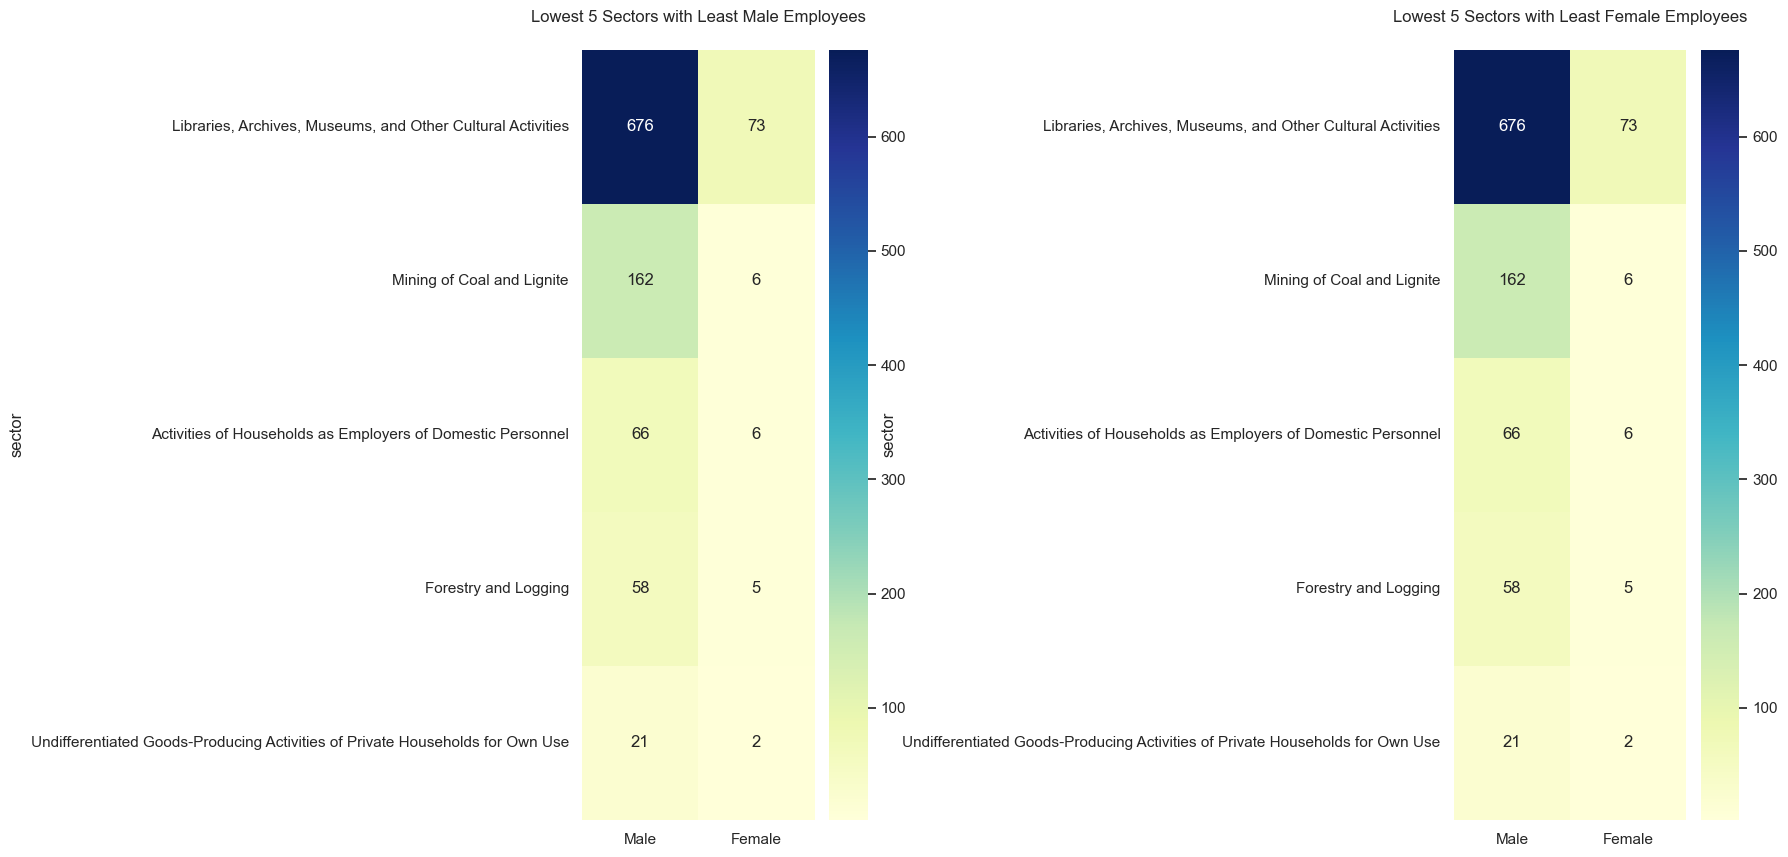

In [26]:
# Group the data by sector and calculate the sum of male and female employees
highest_sectors_of_employees = df_2022_q4.groupby('sector').agg({
    'number_of_saudi_employees (male)': 'sum',
    'number_of_foreign_employees (male)': 'sum',
    'number_of_saudi_employees (female)': 'sum',
    'number_of_foreign_employees (female)': 'sum'
})

# Calculate the total male employees by summing Saudi and foreign employees
highest_sectors_of_employees['total_male_employees'] = (
        highest_sectors_of_employees['number_of_saudi_employees (male)'] +
        highest_sectors_of_employees['number_of_foreign_employees (male)']
)

# Calculate the total female employees by summing Saudi and foreign employees
highest_sectors_of_employees['total_female_employees'] = (
        highest_sectors_of_employees['number_of_saudi_employees (female)'] +
        highest_sectors_of_employees['number_of_foreign_employees (female)']
)


# Get the 5 least sectors with the lowest number of male employees
lowest_sectors_of_male = highest_sectors_of_employees.sort_values(by='total_male_employees', ascending=False).tail(5)


# Get the 5 least sectors with the lowest number of female employees
lowest_sectors_of_female = highest_sectors_of_employees.sort_values(by='total_female_employees', ascending=False).tail(
    5)

# Set up the plot style
sns.set(style='whitegrid')

# Create a matrix of 2x2 heatmaps for the top and lowest 5 sectors with male and female employees
fig, axes = plt.subplots(1, 2, figsize=(15, 10), gridspec_kw={'wspace': 2, 'hspace': 0.5})

# Heatmap for Top 5 Sectors with Highest Male Employees
sns.heatmap(data=lowest_sectors_of_male[['total_male_employees', 'total_female_employees']],
            annot=True, fmt=",.0f", xticklabels=['Male', 'Female'],
            yticklabels=lowest_sectors_of_male.index, cmap="YlGnBu", ax=axes[0])
axes[0].set_title('Lowest 5 Sectors with Least Male Employees', pad=20)

# Heatmap for Top 5 Sectors with Highest Female Employees
sns.heatmap(data=lowest_sectors_of_female[['total_male_employees', 'total_female_employees']],
            annot=True, fmt=",.0f", xticklabels=['Male', 'Female'],
            yticklabels=lowest_sectors_of_female.index, cmap="YlGnBu", ax=axes[1])
axes[1].set_title('Lowest 5 Sectors with Least Female Employees', pad=20)

# Adjust layout
plt.tight_layout()

# Display the matrix of heatmaps
plt.show()

> ### As can be seen above that the male and female employees share the exact same sectors for the lowest number of employees.

> #### The lowest 5 sectors with the least number of male and female employees are:
- Libraries, Archives, Museums, and Other Cultural Activities
- Mining of Coal and Lignite
- Activities of Households as Employers of Domestic Personnel
- Forestry and Logging
- Undifferentiated Goods-Producing Activities of Private Households for Own Use